# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Import necessary libraries
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview


In [2]:
# Load the dataset
data = pd.read_csv('INNHotelsGroup.csv')

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [6]:
# Get row and column count
data.shape

(36275, 19)

In [7]:
# Review the datatypes for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

*   This dataset contains 14 numerical variables and 5 categorical variables. 
*   `Booking_status`, our dependent variable, can be changed to 0 = not canceled, 1= cancelled during preprocessing. 



In [8]:
# Check for any duplicates in the data
data.duplicated().sum()

0

In [9]:
# Check for any missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
# Review a statistical overview of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


*   `lead-time`: has a mean of 85 days while the median number of days is 57. This variable is skewed to the right and likely has outliers. 
*   `avg_price_per_room`: is also skewed to the right. The average price per room is 103.42 euros per day.
*   The data seems to indicate that clients are first time guests as the previous stays and cancelations are a majority 0. 



In [11]:
# Drop Booking ID since it is not relevant to our analysis
data=data.drop(["Booking_ID"], axis=1)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

###Univariate Analysis

Summary of Univariate Analysis:

*    Created a series of histograms, boxplots, and bar graphs to show the distribution in each numerical variable. 
*   The average price per room had outliers that were extreme enough to warrant transforming them into an upper whisker value.
*    Encoded the booking status variable so that 1 = canceled and 0 = Not canceled. 

Observations: 
*    The busiest month was October with 14.7% of bookings. While September and August were close behind with 12.7% and 10.5%.   
*    Out of all bookings, 32.8% were canceled.
*   The largest market segment was Online bookings which was 64% of all bookings. This is 2x higher than second place, offline bookings.
*   





In [12]:
# Function to create a histogram and boxplot grid
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

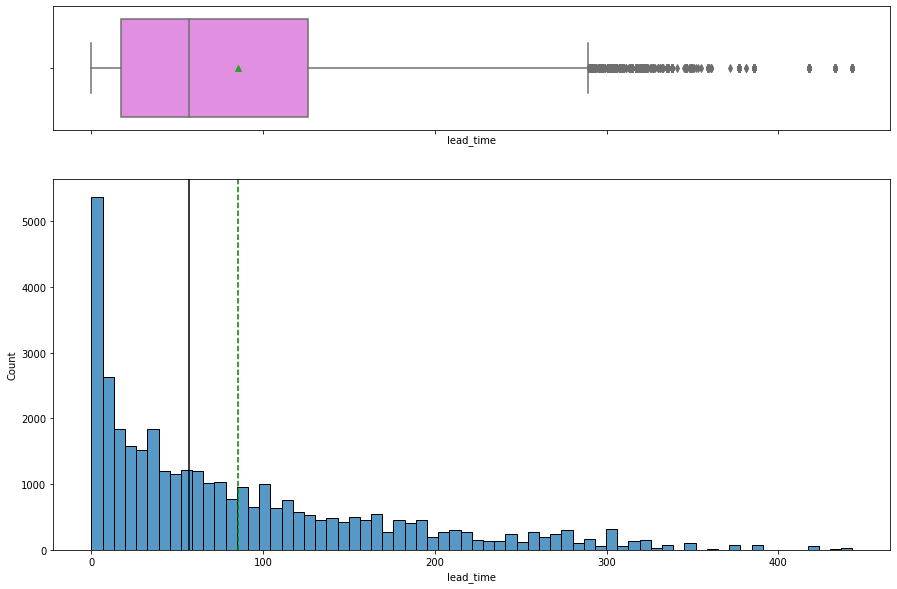

In [13]:
histogram_boxplot(data, 'lead_time')

*    Lead time is positively skewed. We see the average lead time is 85 days and the median is 57 days. 
*    The mode of 0 days could be influenced by comped rooms. 

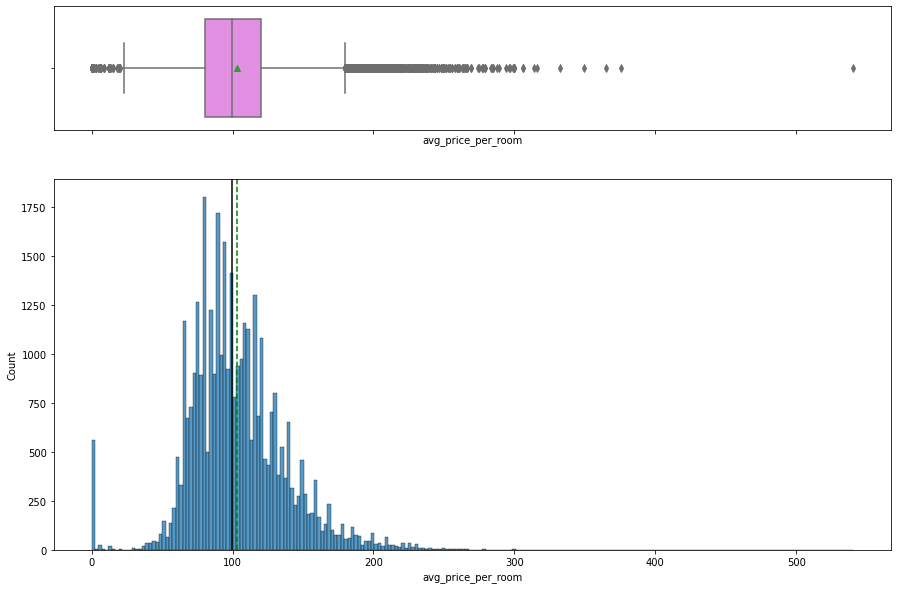

In [14]:
histogram_boxplot(data, 'avg_price_per_room')

In [15]:
data[data["avg_price_per_room"] == 0]


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [16]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()


Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [17]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [18]:
# Assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

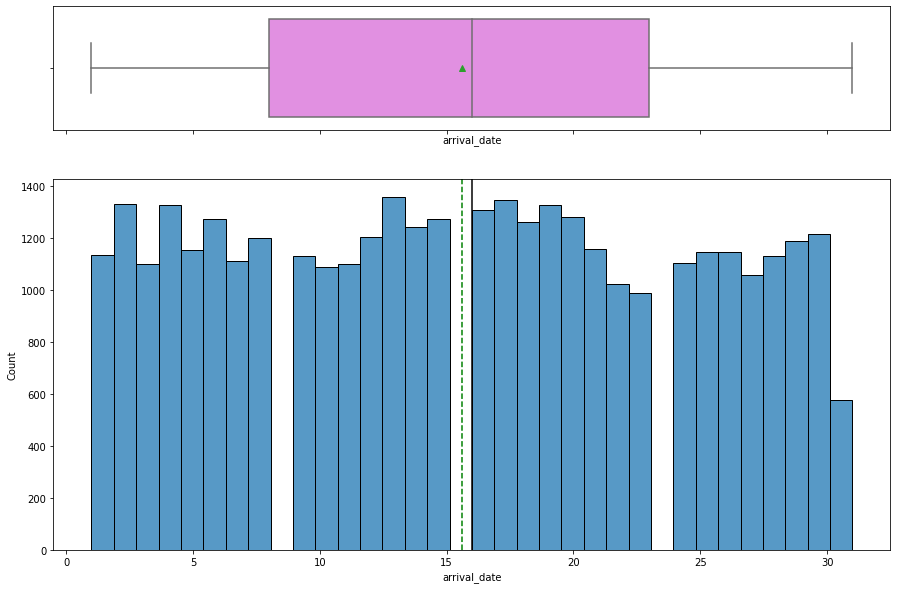

In [19]:
histogram_boxplot(data, 'arrival_date')

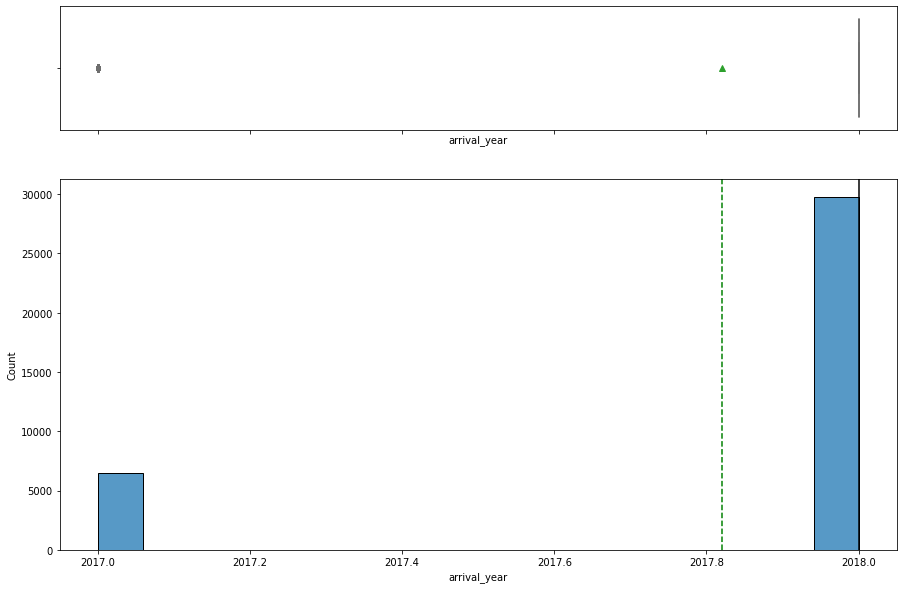

In [20]:
histogram_boxplot(data, 'arrival_year')

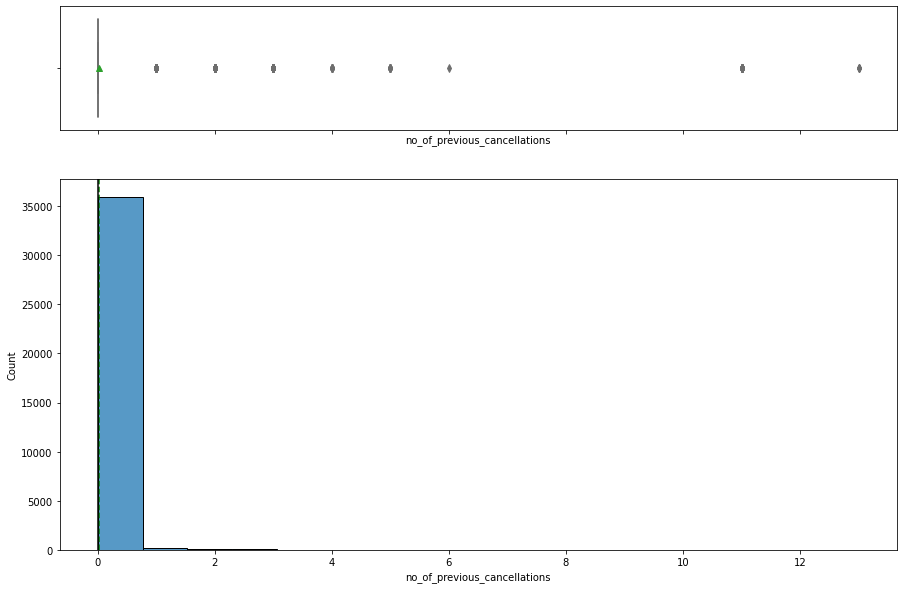

In [21]:
histogram_boxplot(data,'no_of_previous_cancellations')

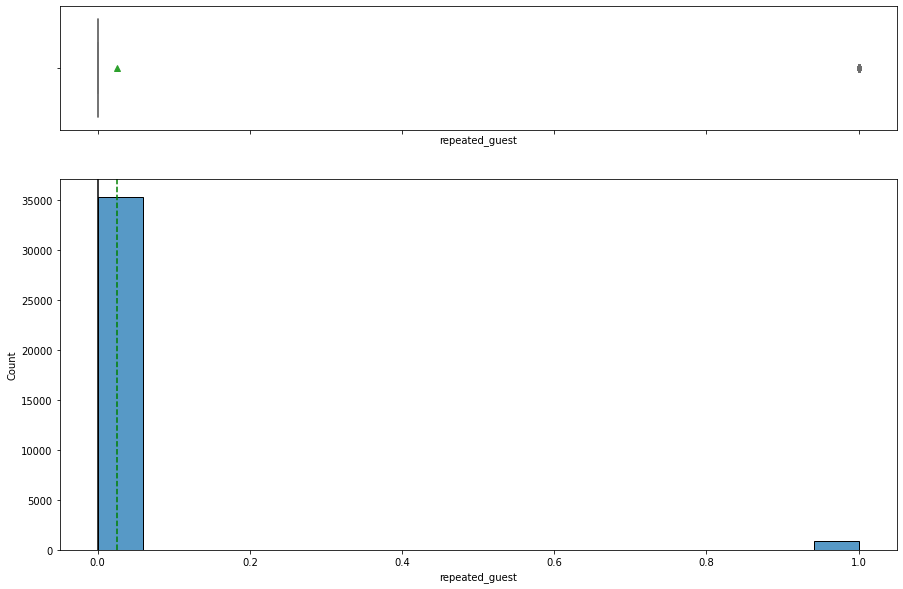

In [22]:
histogram_boxplot(data, 'repeated_guest')

In [23]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

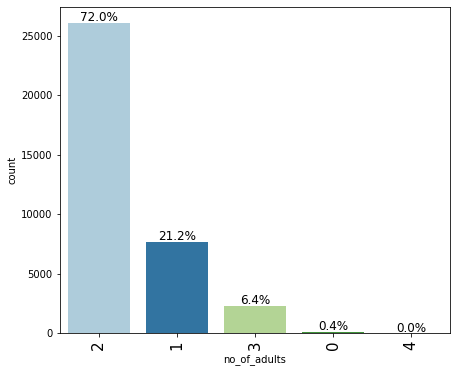

In [24]:
# Labeled barplot for # of adults (percent)
labeled_barplot(data, "no_of_adults", perc=True)

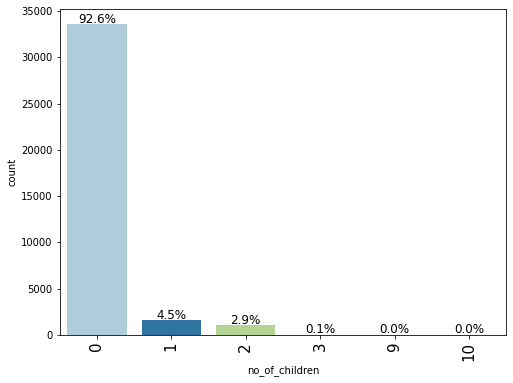

In [25]:
# Labeled barplot for number of children by percentage
labeled_barplot(data, "no_of_children", perc=True)

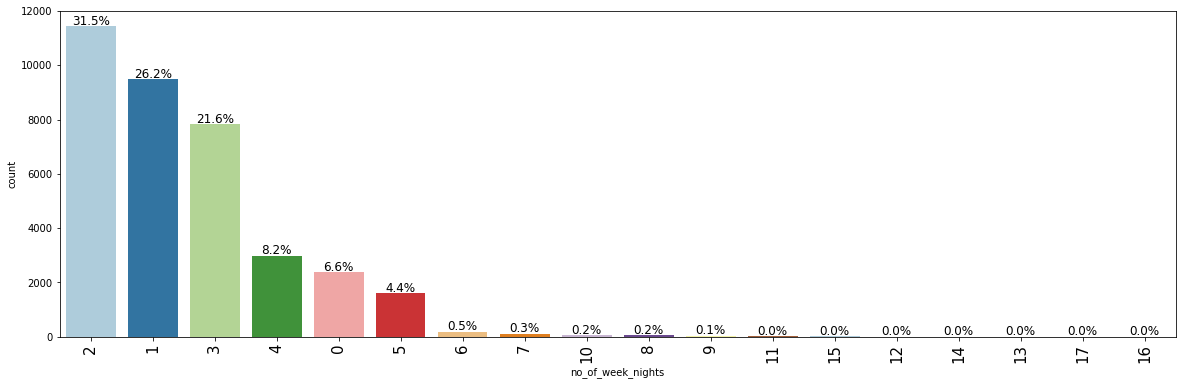

In [26]:
# Barplot for number of week nights by percentage
labeled_barplot(data, "no_of_week_nights", perc=True)

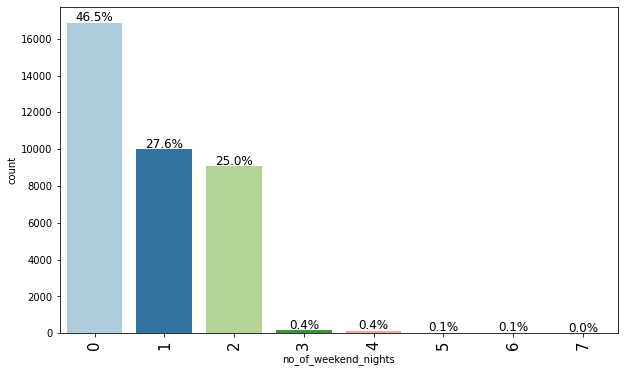

In [27]:
# Barplot for number of weekend nights by percentage
labeled_barplot(data, "no_of_weekend_nights", perc=True)

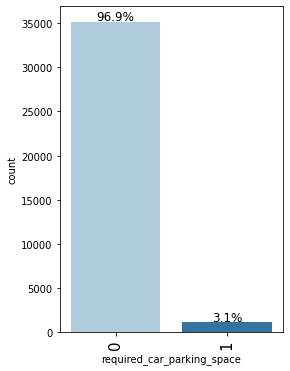

In [28]:
# Barplot for if customers required a parking space by percentage
labeled_barplot(data, "required_car_parking_space", perc=True)

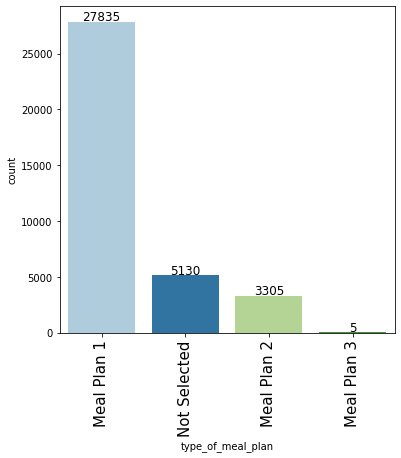

In [29]:
# Barplot for type of meal plan
labeled_barplot(data, "type_of_meal_plan")

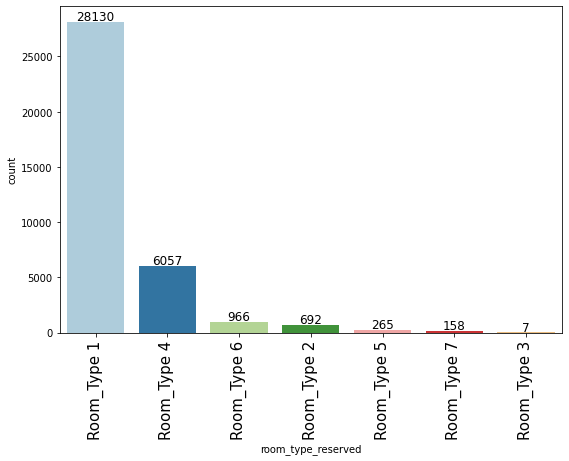

In [30]:
# Barplot for type of room reserved
labeled_barplot(data, "room_type_reserved")

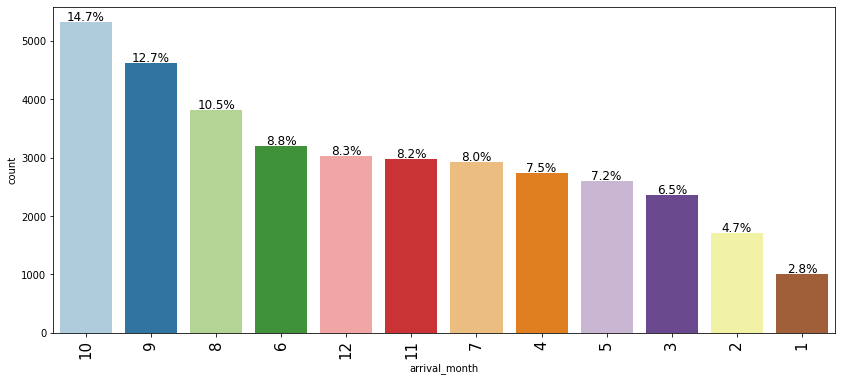

In [31]:
# Barplot for arrival month by percentage
labeled_barplot(data, "arrival_month", perc=True)

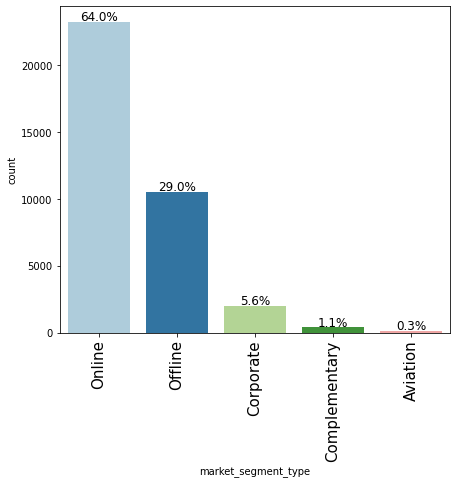

In [32]:
# Barplot for market segment type by percentage
labeled_barplot(data, "market_segment_type", perc=True)

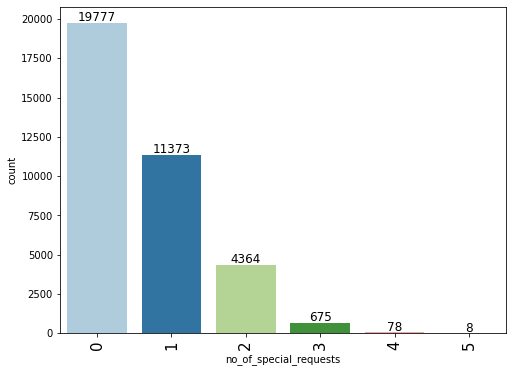

In [33]:
# Barplot for number of special requests
labeled_barplot(data, "no_of_special_requests")

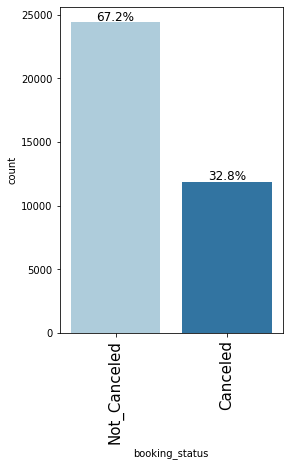

In [34]:
# Barplot for booking status by percentage
labeled_barplot(data, "booking_status", perc=True)

In [35]:
# Encoding booking status
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

Summary of Bivariate Analysis:

*   Created a new variable group size to capture total individuals for each booking (children + adults)
*   Created a total days variable to capture all the days for each booking (weekdays + weekend days)


Key Observations:

*    Heatmap indicates there is little correlation between variables. 
*    The offline market segment has the greatest range of room prices, and the average is slightly higher compared to all other segments. 
*    Out of all repeating guests, 1.7% cancel their bookings.
*    Guests who had no special requests canceled 43% of the time. While guests who had one special request had a cancelation rate of 24%. The more special requests there were, the less number of customers canceled.
*    The busiest months saw the highest number of guests.
*    July had the highest number of cancelations compared to all other months. 


In [3]:
# Function to plot a quadrant of histogram and boxplots with and without outliers
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [4]:
# Function for stacked barplots
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

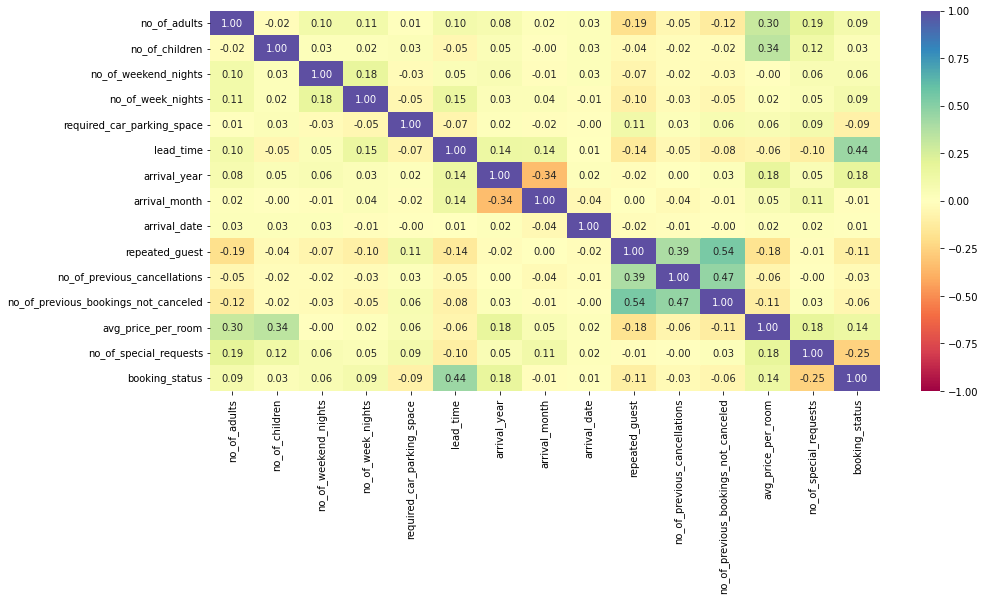

In [38]:
# Heatmap for numerical values
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



*   This heatmap shows there is little correlation between independent variables.
*   The highest correlation is between being a repeat guest, and not cancelling bookings. 
*   However, there is little to learn from this as the second highest correlation is between number of previous cancelations and number of not cancelled bookings. 
*    Instead the focus will shift to understanding the composition of these independent variables. 



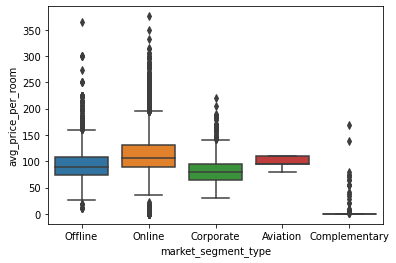

In [39]:
# Boxplot showing distribution of prices per room categorized by their market segment type
sns.boxplot(data=data, x='market_segment_type', y='avg_price_per_room');

Noteably while offline and online users are likely the same demographic, the offline group tends to pay less for bookings than the online group. 

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


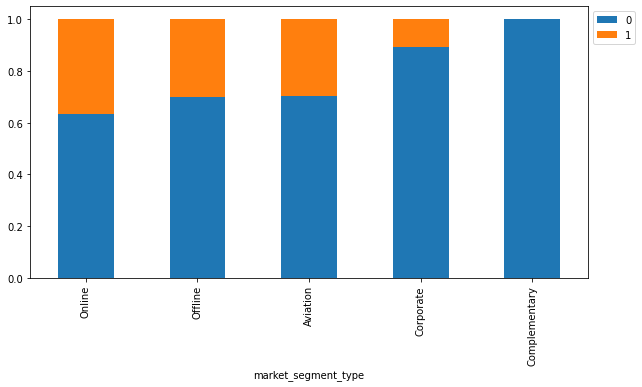

In [40]:
# Stacked barplot showing booking status of each market segment type
stacked_barplot(data, 'market_segment_type', 'booking_status')

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


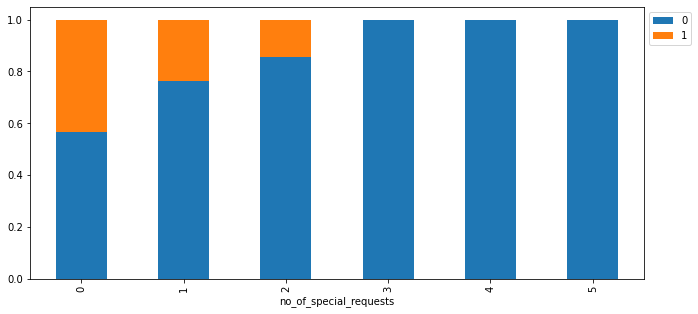

In [41]:
# Stacked barplot showing the booking status by number of special requests
stacked_barplot(data, "no_of_special_requests", "booking_status")

Guests who had no special requests canceled 43% of the time. While guests who had one special request only canceled 24% of the time. The more special requests there were, the less number of customers canceled. 

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


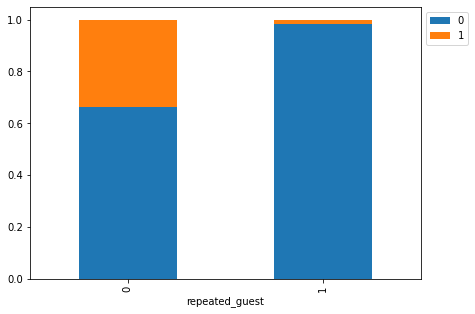

In [42]:
# Stacked barplot showing cancelation rates among repeat customers
stacked_barplot(data, "repeated_guest", "booking_status")

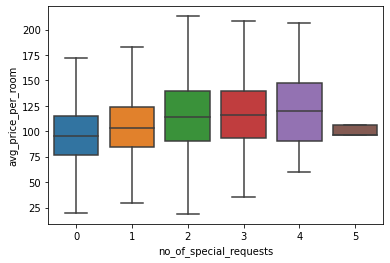

In [43]:
# Boxplot showing the distribution of prices by number of special requests
sns.boxplot(data=data, x="no_of_special_requests", y="avg_price_per_room", showfliers=False);
plt.show()

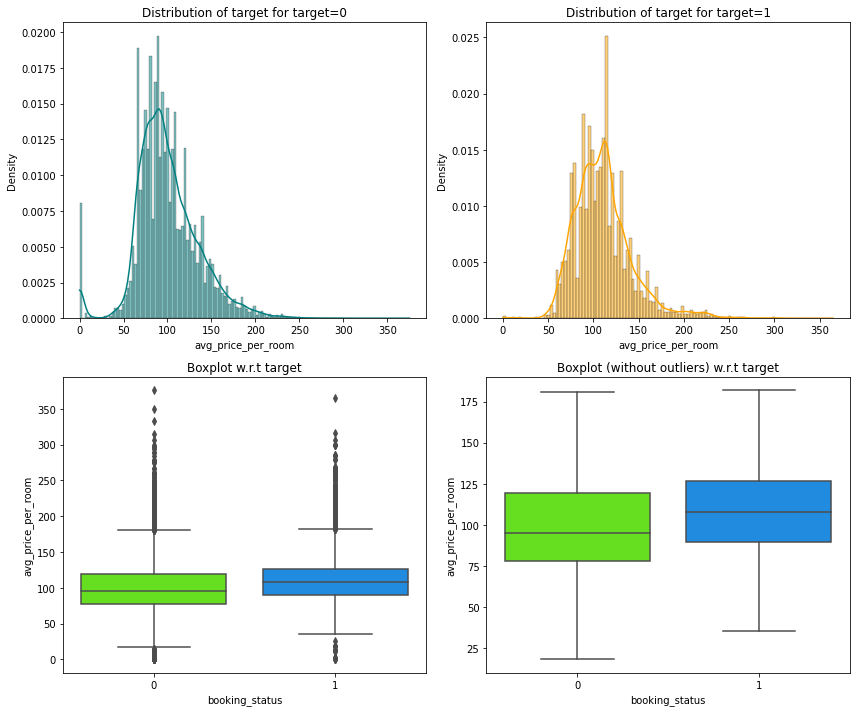

In [44]:
# Comparitive distribution of average price per room and booking status
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

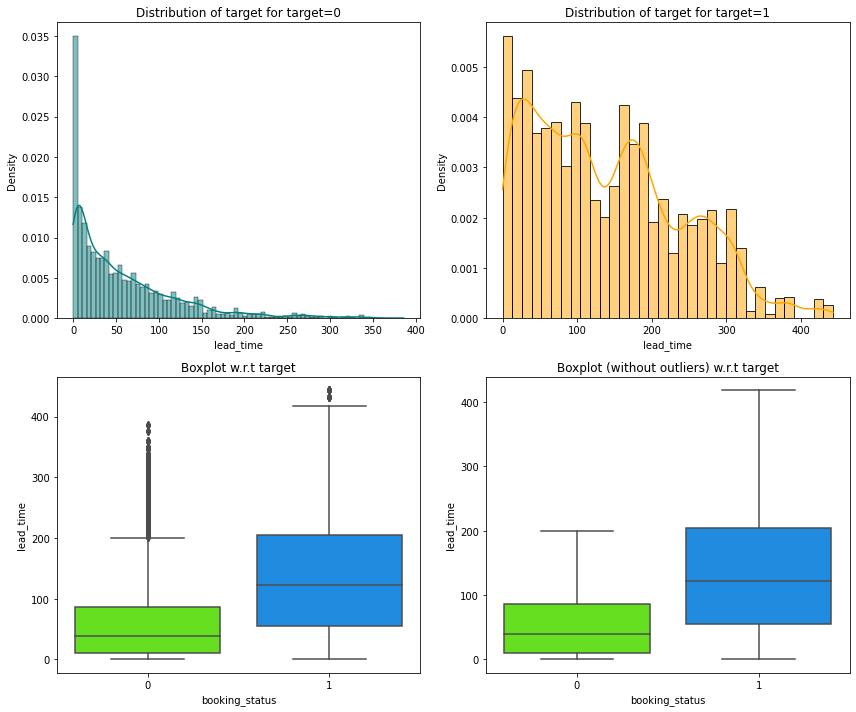

In [45]:
# Comparitive distribution of lead time and booking status
distribution_plot_wrt_target(data, "lead_time", "booking_status")

In [46]:
# Create a new dataset for total number of guests per booking
group_size =(data["no_of_children"]>=0)+(data["no_of_adults"]>1)

In [47]:
# Updating dataframe to include number of individuals and booking status
group_size["no_of_individuals"]=(
    data["no_of_adults"]+ data["no_of_children"]
)
group_size['booking_status']=data['booking_status']

booking_status      0      1    All
row_0                              
All             24390  11885  36275
2               15662   8280  23942
1                5743   1809   7552
3                2459   1392   3851
4                 514    398    912
5                  10      5     15
11                  0      1      1
10                  1      0      1
12                  1      0      1
------------------------------------------------------------------------------------------------------------------------


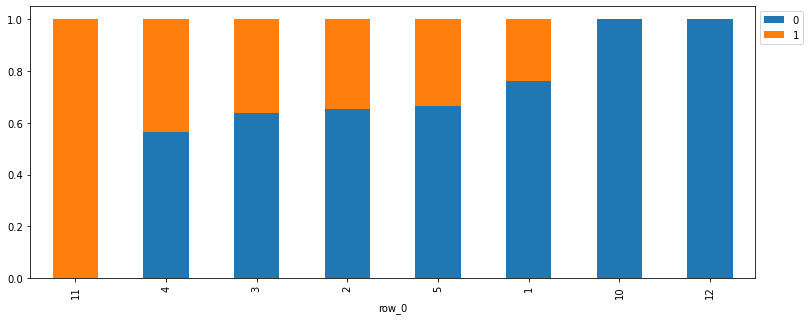

In [48]:
# Stacked barplot for booking status and group size
stacked_barplot(group_size,"no_of_individuals", "booking_status")

The table for this graph explains that most bookings had less than 4 children, and outliers such as 10-12 each only had one family represented. This graph is not a good indicator in this case.

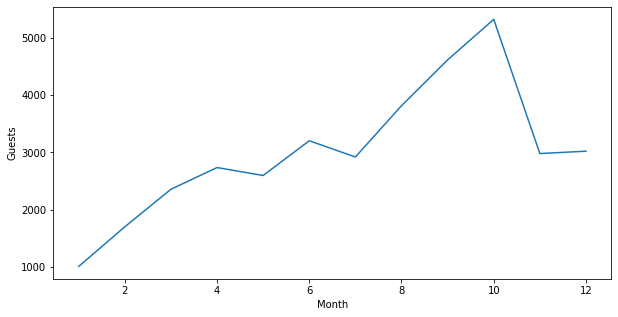

In [49]:
# Grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# Creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# Plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


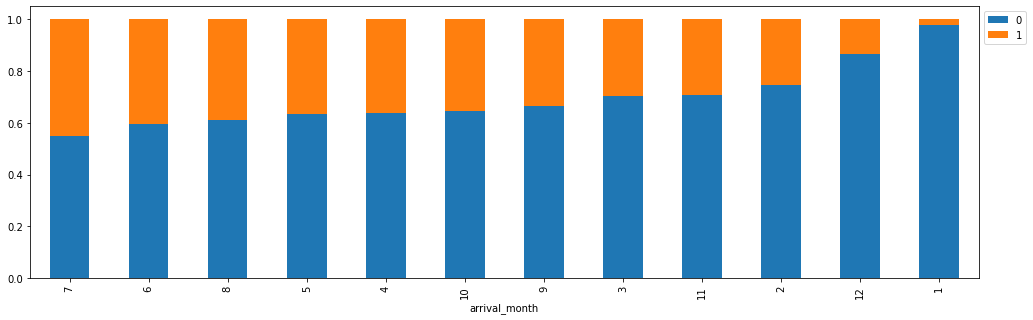

In [50]:
# Stacked barplot comparing arrival month to booking status
stacked_barplot(data, "arrival_month", "booking_status")

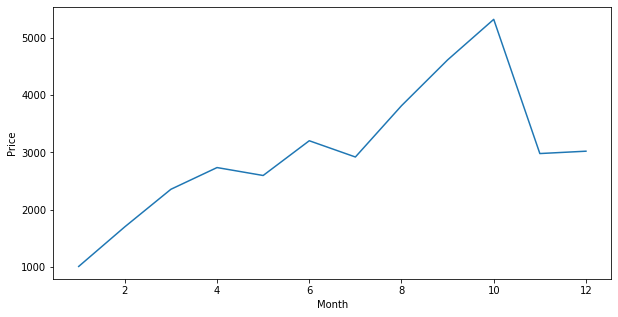

In [51]:
# Grouping the data on arrival months and extracting the price per room
month_price = data.groupby(["arrival_month"])["avg_price_per_room"].count()

# Creating a dataframe with months and price of each room for each month
month_price = pd.DataFrame(
    {"Month": list(month_price.index), "Price": list(month_price.values)}
)

# Plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=month_price, x="Month", y="Price")
plt.show()

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


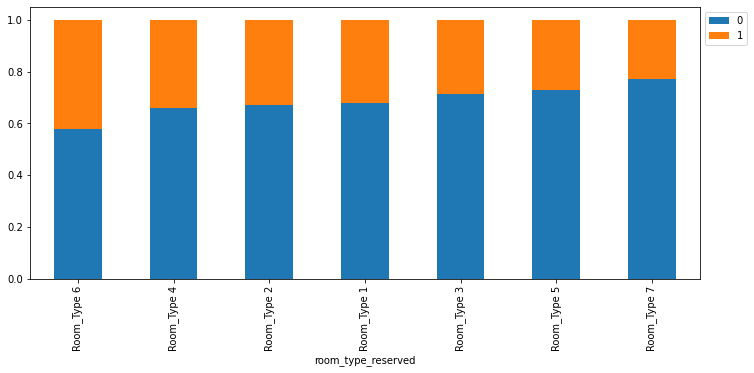

In [52]:
# Stacked barplot comparing booking status and type of room reserved
stacked_barplot(data, 'room_type_reserved', 'booking_status')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

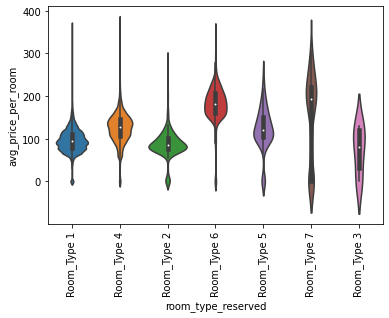

In [53]:
# Plot showing distrubtion of room type and average price per room without outliers
sns.violinplot(data=data, x="room_type_reserved", y="avg_price_per_room", showfliers=False);
plt.xticks(rotation=90)

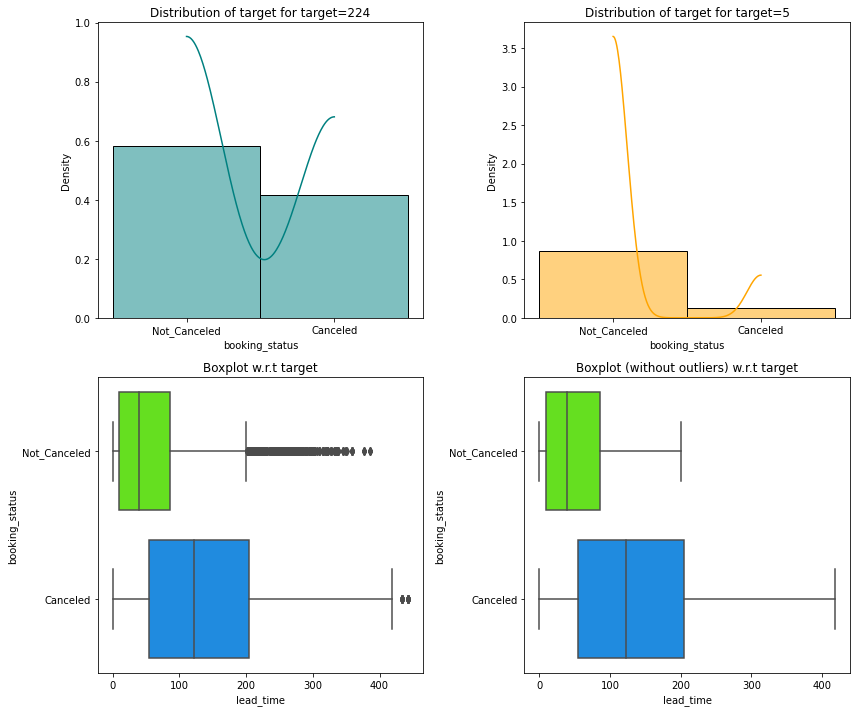

In [5]:
# Comparitive distribution of lead time and booking status
distribution_plot_wrt_target(data,'booking_status', 'lead_time' )

In [55]:
# Create a new dataset for total number of guests per booking
length_of_stay =(data["no_of_week_nights"]>=0)+(data["no_of_weekend_nights"]>0)

In [56]:
# Update dataframe to include total days and booking status
length_of_stay["total_days"]=(data["no_of_week_nights"])+(data["no_of_weekend_nights"])
length_of_stay['booking_status']=data['booking_status']

booking_status      0      1    All
row_0                              
All             24390  11885  36275
3                6466   3586  10052
2                5573   2899   8472
4                3952   1941   5893
1                5138   1466   6604
5                1766    823   2589
6                 566    465   1031
7                 590    383    973
8                 100     79    179
10                 51     58    109
9                  58     53    111
14                  5     27     32
15                  5     26     31
13                  3     15     18
12                  9     15     24
11                 24     15     39
20                  3      8     11
16                  1      5      6
19                  1      5      6
17                  1      4      5
18                  0      3      3
21                  1      3      4
22                  0      2      2
0                  76      2     78
23                  1      1      2
24                  0      1

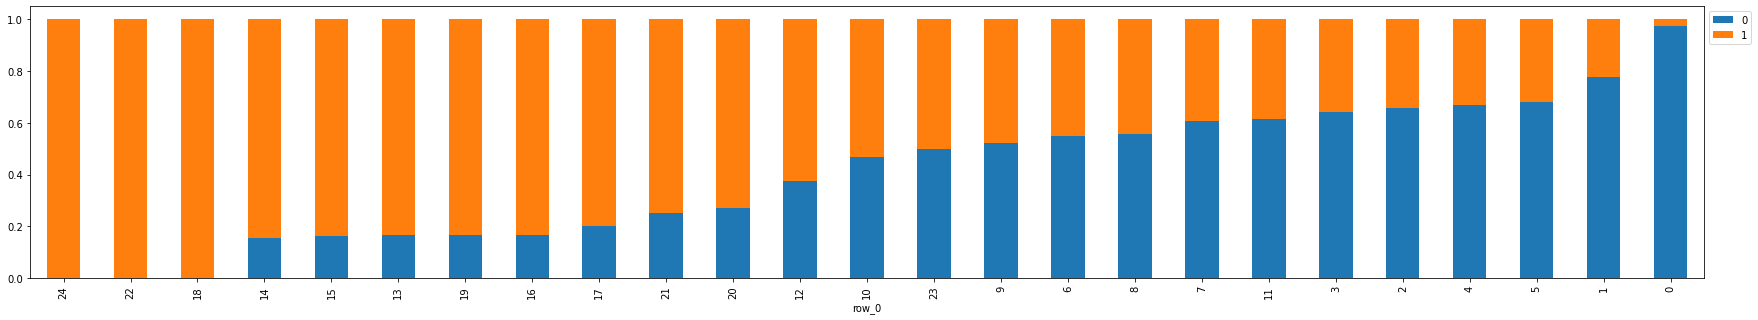

In [57]:
# Stacked barplot showing the booking status based on length of stay
stacked_barplot(length_of_stay, "total_days", "booking_status")

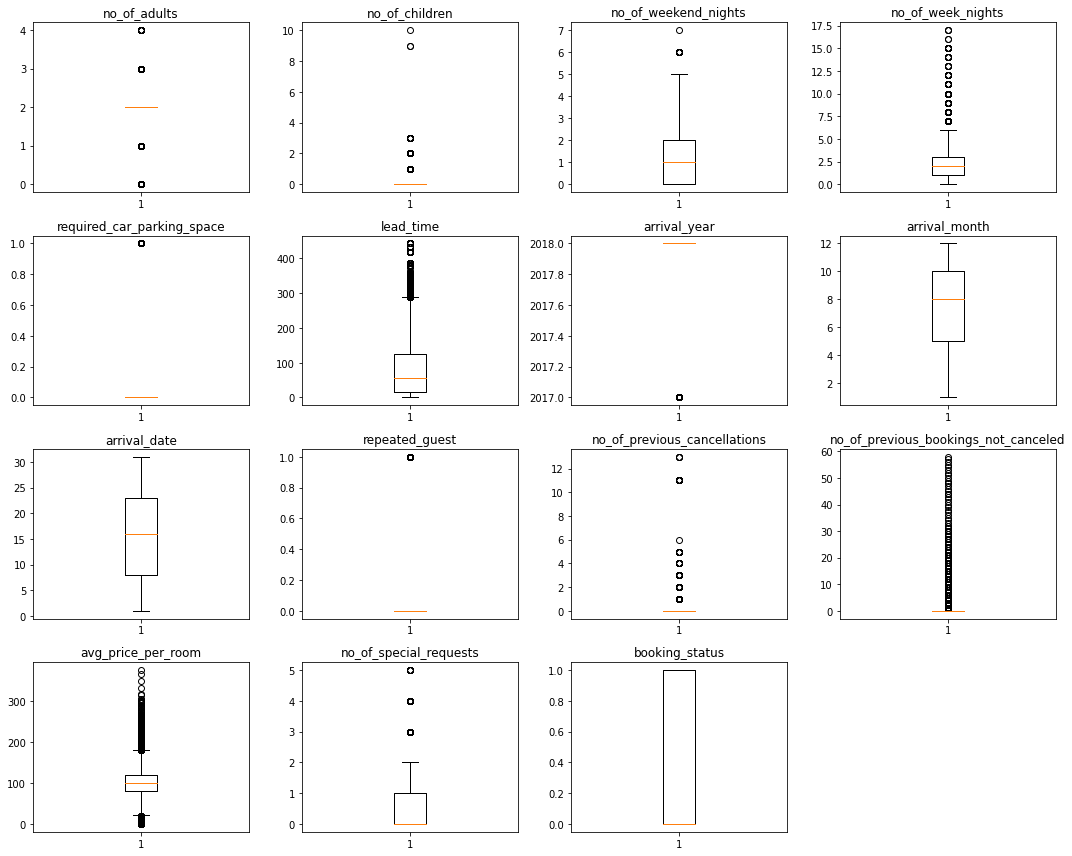

In [58]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

These outliers are not related to bad data, and will remain part of the dataset for  observation. 

In [59]:
# Create dependent and independent variables
X=data.drop(["booking_status"], axis=1)
Y=data["booking_status"]
# Add a constant to the independent variables
X=add_constant(X)
# Create dummy variables
X=pd.get_dummies(X, drop_first=True)

In [60]:
# Split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [61]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # Rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # To compute Accuracy
    recall = recall_score(target, pred)  # To compute Recall
    precision = precision_score(target, pred)  # To compute Precision
    f1 = f1_score(target, pred)  # To compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [62]:
# Defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [63]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67238
1   0.32762
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67233
1   0.32767
Name: booking_status, dtype: float64


In [64]:
# Fit the logisitic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

         Current function value: 0.422390
         Iterations: 35


In [65]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3322
Time:                        01:19:51   Log-Likelihood:                -10725.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -886.4592    121.331     -7.306      0.000   -1124.263    -648.655
no_of_adults                             0.0334      

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [66]:
# Calculate VIF score
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39621295.54521
no_of_adults                                  1.34537
no_of_children                                2.00767
no_of_weekend_nights                          1.06726
no_of_week_nights                             1.09437
required_car_parking_space                    1.03499
lead_time                                     1.40220
arrival_year                                  1.43420
arrival_month                                 1.27814
arrival_date                                  1.00764
repeated_guest                                1.75027
no_of_previous_cancellations                  1.32201
no_of_previous_bookings_not_canceled          1.57088
avg_price_per_room                            2.04622
no_of_special_requests                        1.24725
type_of_meal_plan_Meal Plan 2                 1.26317
type_of_meal_plan_Meal Plan 3                 1.00796
type_of_meal_plan_Not Selected                1

*    A high VIF score is acceptable for dummy variables so market segment type will be left as is. 
*    No other variables have a VIF > 5. 


In [67]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80687,0.63301,0.73992,0.68230


## Removing high p-values


**Removing high p-value variables**

In [68]:
# Initial list of columns
cols = X_train.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


## Building a Logistic Regression model

In [69]:
# Create training and test groups with select features
X_train1 = X_train[selected_features]
X_test1=X_test[selected_features]

In [70]:
# Create a new model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3312
Time:                        01:20:08   Log-Likelihood:                -10742.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.4077    120.911     -7.191      0.000   -1106.388    -632.427
no_of_weekend_nights               0.1497      0.020      7.564      0.

Now that multicollinearity and p-values have been addressed our model now has 19 independent variables. Converting the coefficients to odds will be helpful in interpreting this model's insights on this binary classification.

**Converting coefficients to odds**

In [71]:
# Converting coefficients to odds
odds = np.exp(lg1.params)

# Finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# Removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.16153,1.03682,0.19886,1.01601,1.53653,0.95191,0.04623,1.33523,1.01925,0.22638,1.18026,1.23366,0.68845,0.76451,0.50213,0.47521,0.26776,0.41854,0.17012
Change_odd%,-100.00000,16.15325,3.68173,-80.11371,1.60134,53.65324,-4.80895,-95.37690,33.52334,1.92531,-77.36171,18.02564,23.36580,-31.15506,-23.54886,-49.78672,-52.47870,-73.22410,-58.14571,-82.98809


Key observations on odds:
*   Each additional weekend night added to the booking increases chances of cancelation by 16%.
*   If a guest has previously canceled there is a 33% chance of another cancelation.
*   Each additional day added to the lead time increases chance of cancelation by 1.6%.



## Model performance evaluation

The goal of this project is to better predict cancelations to cut business expenses. Keeping this in mind there are two errors that can occur in this project:

*   Failure to predict cancelations
*   Falsely predicting cancelations

Both of these errors have a cost to the business. False predictions can lead to unprepared INN hotels that impact brand perception. On the other hand, failure to predict cancelations has a financial cost to INN hotels. 

**For this reason, model performance will focus on the F-1 score.**


**Training set performance**

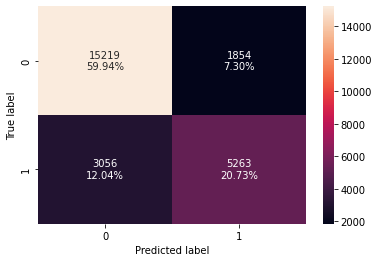

In [72]:
# Check model performance on the training set
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [73]:
# Create a dataframe with new model to check performance on training data
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80663,0.63265,0.73950,0.68191


**Test set performance**

In [74]:
# Drop columns from the test set to match dropped columns from the training set
X_test = X_test[list(X_train1.columns)]

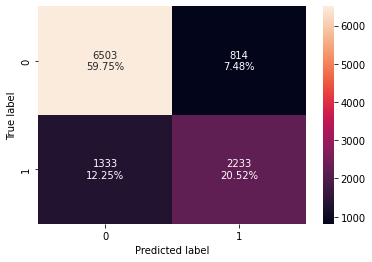

In [75]:
# Check model performance on the test set
confusion_matrix_statsmodels(lg1, X_test, y_test)

In [76]:
# Create a dataframe with new model to check performance on training data
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80272,0.62619,0.73285,0.67534


*    Comparing the training and test performance, the Recall score decreased and therefore the F1 score decreased on the test data. 

*    While this decrease is acceptable, further analysis will be done on the threshold to see if we can increase this score. 

**Observations on model performance**




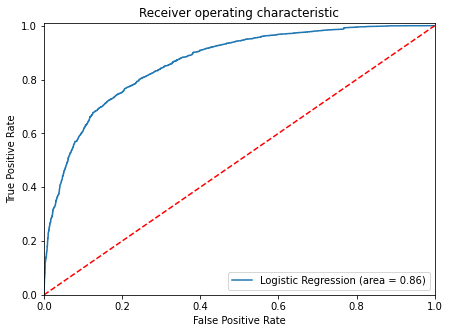

In [77]:
#ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [78]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.33300753336838296


The ROC-AUC is a tool used to measure your models performance: the larger the area of the curve the better. This graph shows we have a good model, and suggests a threshold of 33% for peak performance. 

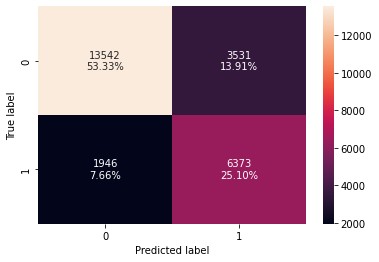

In [79]:
# Creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [80]:
# Checking performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78430,0.76608,0.64348,0.69945


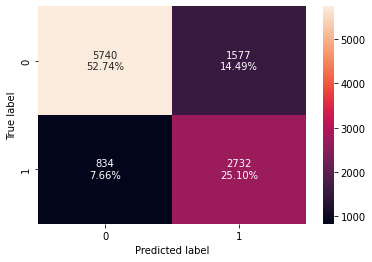

In [81]:
# Check model performance on the test set
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)

In [82]:
# Checking performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_test_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.77846,0.76612,0.63402,0.69384


By changing the threshold to 33% we were able to improve the F1 score by 2.

Let's compare this threshold to the threshold put forth by the Precision-Recall curve. 

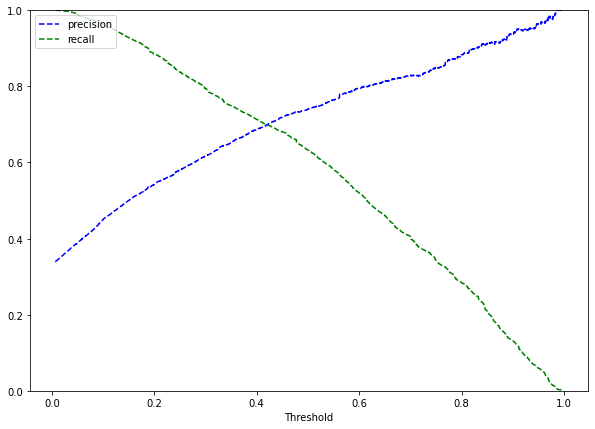

In [83]:
# Plot a precision recall curve
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

The precision recall threshold is showing keeping threshold and recall in balance, the ideal threshold will be 42%.

In [84]:
# Setting a new threshold
precision_recall_threshold=.42

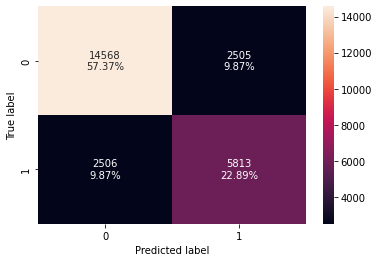

In [85]:
# Check model performance on the training set
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=precision_recall_threshold
)

In [86]:
# Create a new datafrane to check training model performance with new threshold
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=precision_recall_threshold
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80265,0.69876,0.69885,0.69880


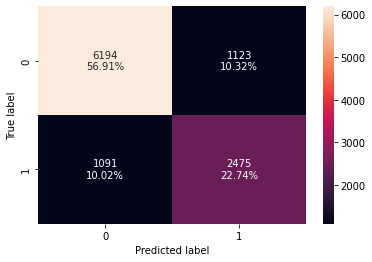

In [87]:
# Check model performance on the test set
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=precision_recall_threshold
)

In [88]:
# Create a new datafrane to check training model performance with new threshold
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=precision_recall_threshold
)
print("Training performance:")
log_reg_model_test_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79656,0.69405,0.68788,0.69095


The F1 score on the test data is very similar for the 33% and 42% threshold. 

## Final Model Summary

In [89]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.33 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80663,0.78430,0.80265
Recall,0.63265,0.76608,0.69876
Precision,0.73950,0.64348,0.69885
F1,0.68191,0.69945,0.69880


In [90]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.33 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80272,0.77846,0.79656
Recall,0.62619,0.76612,0.69405
Precision,0.73285,0.63402,0.68788
F1,0.67534,0.69384,0.69095


**SUMMARY**
This model was built with the intent to better predict cancelations for Inn Hotels. It takes into consideration the importance of avoiding errors in falsey predicting cancelations which could damage brand perception. It also was equally cautious on avoiding missing cancelations which impacts INN Hotels' bottom line. 

The result of this logisitic regression model is an ability to predict 69.38% of cancelations. 

## Building a Decision Tree model

In [91]:
# Create dependent and independent variables
X=data.drop(["booking_status"], axis=1)
Y=data["booking_status"]
# Add a constant to the independent variables
X=add_constant(X)
# Create dummy variables
X=pd.get_dummies(X, drop_first=True)

In [92]:
# Split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [93]:
# Fit the model
model = DecisionTreeClassifier(criterion='gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [94]:
# Function to compute different metrics to check performance of a model
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [95]:
# Function to create confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

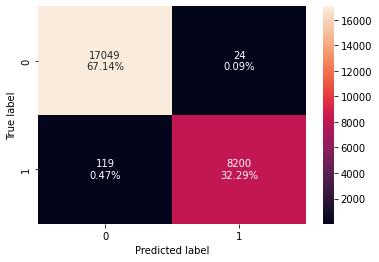

In [96]:
# Check model performance on the training set
confusion_matrix_sklearn(model, X_train, y_train)

In [97]:
# Create a dataframe with new model to check performance on training data
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99437,0.98570,0.99708,0.99136


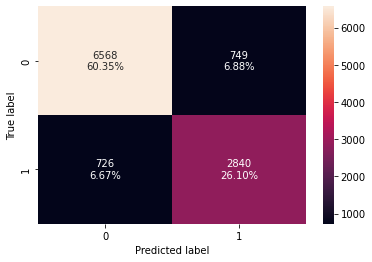

In [98]:
# Check model performance on the test set
confusion_matrix_sklearn(model, X_test, y_test)

In [99]:
# Create a dataframe with new model to check performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86447,0.79641,0.79131,0.79385


Without any pruning decision trees can overfit the training data. While testing on the test dataset resulted in a .79 F1 score, more evaluation should be done on this model to avoid overfitting. 

## Do we need to prune the tree?

### Pre-Pruning Evaluation

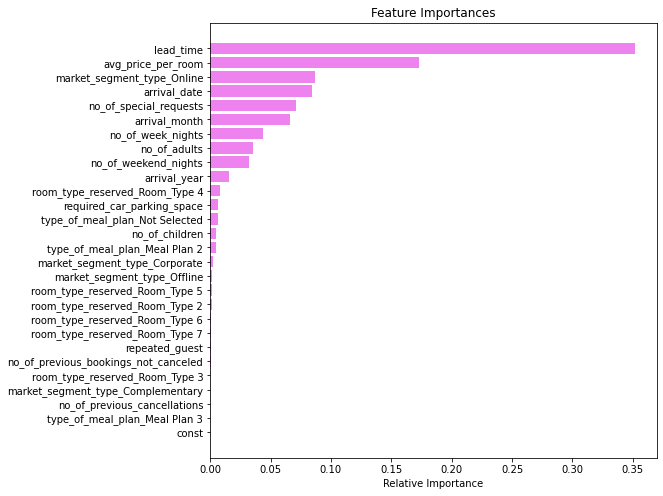

In [100]:
# Importance of features in the tree building
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to this decison tree the most relevant independent variables include: 

1.   Lead time
2.   Average price per room
3.   If booking was made online. 
4.   Arrival date
5.   Number of special requests

The first two variables clearly make sense in light of general knowledge of consumer behavior. Also, variable 3. market segment type- online, could be a scaling issue (something to be learned in future units). This seems to be the case as almost all bookings were made online.  The most surprising variable is the arrival date. 



### Pre-Pruning

In [101]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=70, random_state=1)

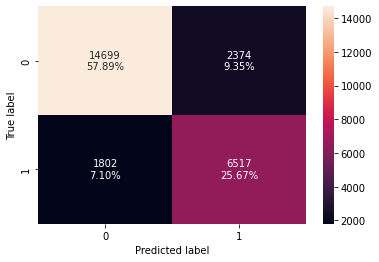

In [102]:
# Check model performance on the training set
confusion_matrix_sklearn(estimator, X_train, y_train)

In [103]:
# Create a dataframe with new model to check performance on training data
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) 
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83554,0.78339,0.73299,0.75735


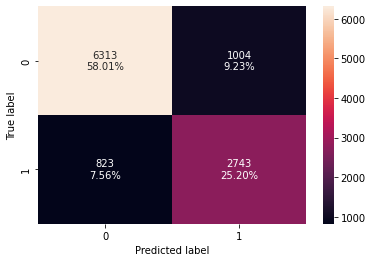

In [104]:
# Check model performance on the test set
confusion_matrix_sklearn(estimator, X_test, y_test)

In [105]:
# Create a dataframe with new model to check performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83212,0.76921,0.73205,0.75017


After pre-pruning the tree the F1 score on the test dataset has reduced to .75. 

In [106]:
# Measure importance of variables in the training set
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

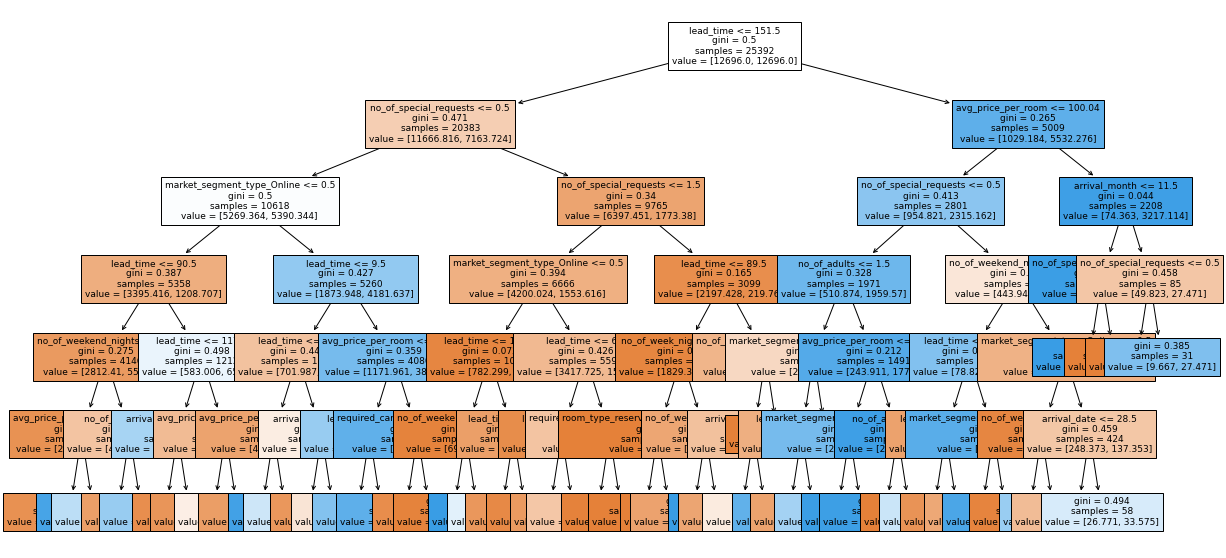

In [107]:
# Visualize decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [108]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- weights: [2356.56, 293.02] class: 0
|   |   |   |   |   |--- avg_price_per_room >  202.00
|   |   |   |   |   |   |--- weights: [1.49, 21.37] class: 1
|   |   |   |   |--- no_of_weekend_nights >  1.50
|   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |--- weights: [104.11, 157.19] class: 1
|   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |--- weights: [350.25, 83.94] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |--- weights: [245.40, 512.78] class: 1
|   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |--- weights: [43.13, 4.58] class: 0


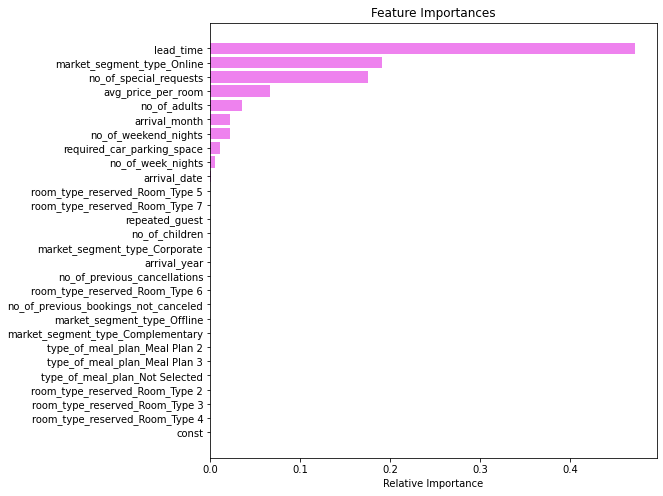

In [109]:
# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

After the first tree pruning our independent variables order of importance has changed: 


1.   Lead time
2.   If booking was made online
3.   Number of special requests
4.   Average price per room
5.   Number of adults

Similar to our initial observation on importance, lead time, market segment type-online, and average price are still important variables. New variables of note are number of special requests, number of adults. 



### Cost Complexity Pruning

In [110]:
# Measure quality of each split
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
# Trims decision tree based on effective alphas at each step of pruning process
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [111]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00833
1,0.00000,0.00833
2,0.00000,0.00833
3,0.00000,0.00833
4,0.00000,0.00833
...,...,...
1649,0.00938,0.32791
1650,0.00941,0.33732
1651,0.01253,0.34985
1652,0.03405,0.41794


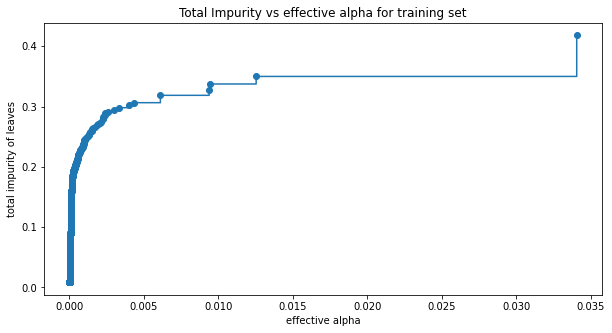

In [112]:
# Plot that removes max effective alpha value
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [114]:
# Train decision tree using effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08205938055988554


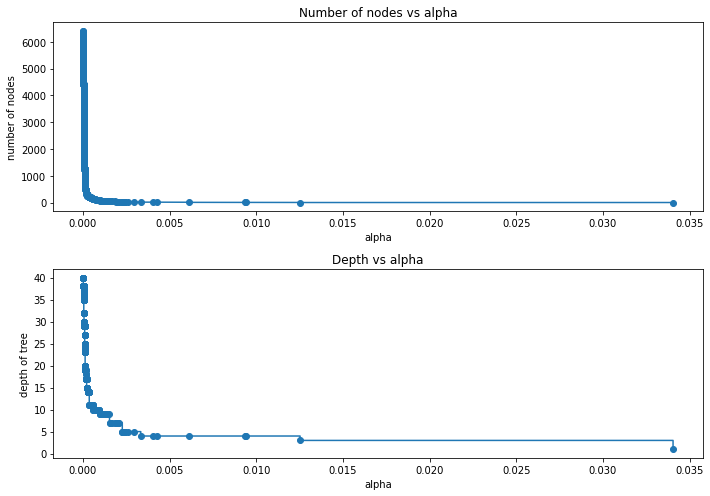

In [115]:
# Visualize the number of nodes and tree depth
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [116]:
# Create new model based on results of cost complexity model 
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

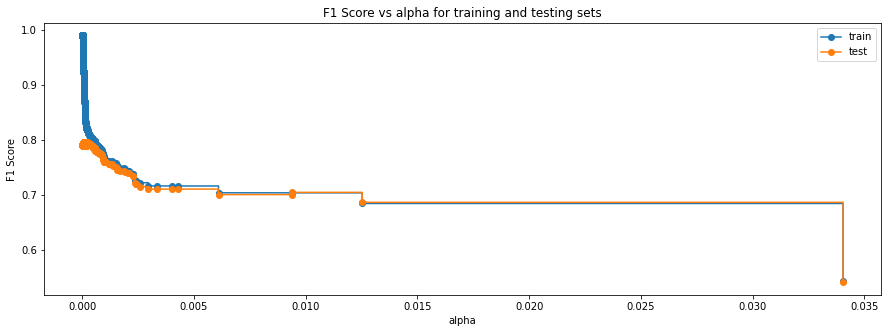

In [117]:
# Visualize F1 score as alpha increases
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [118]:
# Create the model where we get the F1 score on the test data
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00010709530427669946,
                       class_weight='balanced', random_state=1)


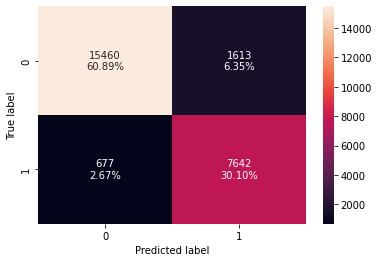

In [119]:
# Check model performance on the training set
confusion_matrix_sklearn(best_model, X_train, y_train)

In [120]:
# Create a dataframe with new model to check performance on training data
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.90981,0.91862,0.82572,0.86969


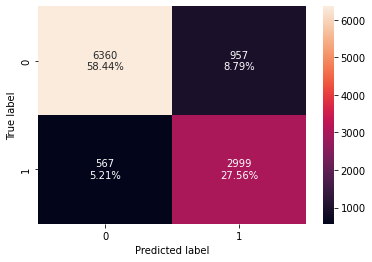

In [121]:
# Check model performance on the test set
confusion_matrix_sklearn(best_model, X_test, y_test)

In [122]:
# Create a dataframe with new model to check performance on test data
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.85997,0.84100,0.75809,0.79739


## Model Performance Comparison and Conclusions

In [123]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99437,0.83554,0.90981
Recall,0.98570,0.78339,0.91862
Precision,0.99708,0.73299,0.82572
F1,0.99136,0.75735,0.86969


In [124]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86447,0.83212,0.85997
Recall,0.79641,0.76921,0.84100
Precision,0.79131,0.73205,0.75809
F1,0.79385,0.75017,0.79739


## Actionable Insights and Recommendations

**What profitable policies for cancellations and refunds can the hotel adopt?**

Special policies for booking in advance: the greater the lead time, the more likely a person was to cancel the booking. 
-    The hotel might consider removing the option to book more than 75 days in advance. 
-    Alternatively, consider looking into creating a loyalty program where individuals can pay a membership fee for the right to book in advance. Repeat clients are less likely to cancel, and this cost might offset the chance of cancelation. 

Special policies for booking long stays: For bookings with 8 days or more, they are highly likely to cancel. 
-    The hotel can consider penalties such as a cancelation fee. 
-    Or consider making bookings with high number of days part of the membership program. Maybe those with memberships can book longer stays sooner. While general public only has access to booking 50 days out. 

Push more clients to online booking: While the offline market segment is slightly less likely to cancel than those who book online, the average price per room range for online was higher than offline clients. 

**What other recommedations would you suggest to the hotel?**

For future analysis consider including the following data:
-    More client demographic data.
-    The name of each hotel in Portugal clients booked with. 
-    Hotel amenities
-    Divide the online market segment type into smaller groups (business, vacation, event)
